In [70]:
import mglearn
import matplotlib.pyplot as pl

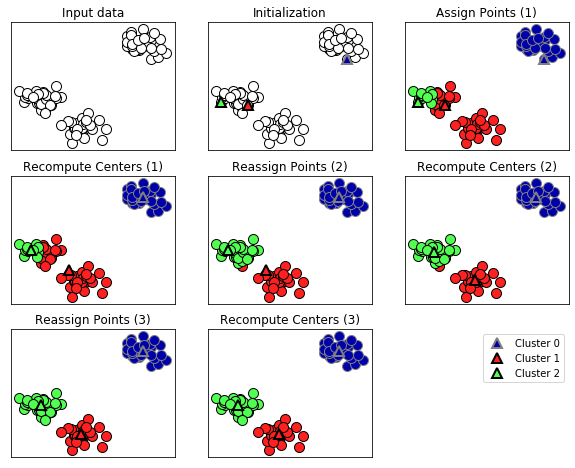

In [71]:
mglearn.plots.plot_kmeans_algorithm()

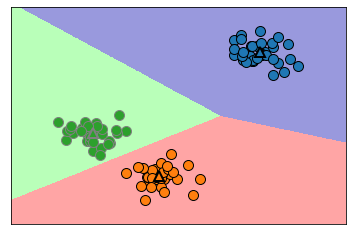

In [72]:
mglearn.plots.plot_kmeans_boundaries()

In [73]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X,y=make_blobs(random_state=1)
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [74]:
kmeans.labels_

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1])

In [75]:
kmeans.predict(X)

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1])

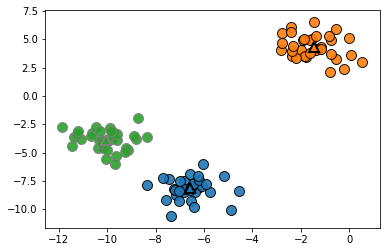

In [76]:
mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers='o',
                        alpha=0.9)
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],
                        kmeans.cluster_centers_[:,1],[0,1,2],
                        markers='^',markeredgewidth=2)

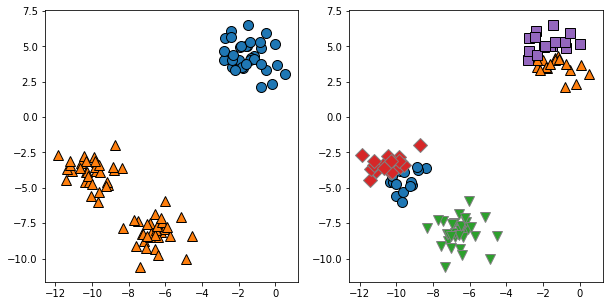

In [79]:
fig,axes=pl.subplots(1,2,figsize=(10,5))
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)
assignments=kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[0])
kmeans=KMeans(n_clusters=5)
kmeans.fit(X)
assignments=kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[1])

# Failure cases of k-means
Even if you know the “right” number of clusters for a given dataset, k-means might
not always be able to recover them. Each cluster is defined solely by its center, which
means that each cluster is a convex shape. As a result of this, k-means can only capture
relatively simple shapes. k-means also assumes that all clusters have the same
“diameter” in some sense; it always draws the boundary between clusters to be exactly
in the middle between the cluster centers.

Text(0, 0.5, 'Feature 1')

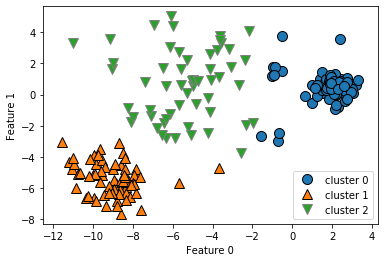

In [100]:
X_varied,y_varied=make_blobs(n_samples=200,cluster_std=[1.0,2.5,0.5],
                            random_state=170)
y_pred=KMeans(n_clusters=3,random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:,0],X_varied[:,1],y_pred)
pl.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
pl.xlabel("Feature 0")
pl.ylabel("Feature 1")